In [72]:
import pandas as pd
import numpy as np
import sidetable
import src as sp
from scipy import stats
import math
import pickle

#librerias limpieza de nulos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Normalizacion
from sklearn.preprocessing import MinMaxScaler


#Estandarización
## esto es un metodo que estandariza automaticamente todas las columnas del dataframe que le pasemos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Normalizacion
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder



#libreria para el balanceo
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from xgboost import XGBRegressor
from  sklearn.ensemble import GradientBoostingRegressor


# para calcular las métricas regresion logistica
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [73]:
df = pd.read_csv("data/fnl_sinoutliers.csv", index_col = False)
df.drop("Unnamed: 0", axis =1, inplace =True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.147387,3.0,1.0,7.0,0.573447,0.297165,-1.266867,-1.304288,-1.241318,6.353
1,0.633437,0.0,0.0,2.0,0.845121,-0.669536,0.617984,0.656417,0.728852,9.183
2,-0.093942,0.0,3.0,4.0,0.030100,0.780515,-0.016255,0.008845,0.004525,7.983
3,0.809011,1.0,2.0,7.0,1.297910,-0.186186,0.725180,0.692394,0.844744,8.371
4,-0.996895,3.0,2.0,3.0,0.482890,0.780515,-1.097141,-1.061449,-1.038506,6.588


In [77]:
df.isnull().sum()

carat       0
cut        20
color      20
clarity    20
depth       0
table       0
x           0
y           0
z           0
price       0
dtype: int64

In [78]:
df.dropna(how="any", inplace=True)

In [79]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Ya esta estandarizada y normalizada, se sacan los distintos modelos para ver cual es el que mejor se adapta

In [80]:

# dividimos el dataset en variables predictoras y respuesta
X = df.drop("price", axis = 1) # variables predictoras
y = df["price"] # variable respuesta

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)

regresion lineal


In [83]:
# iniciamos el método de Linear Regression
lr = LinearRegression()
# es el momento de ajustar el modelo. Para eso usaremos el método .fit() donde le tendremos que pasar las variables predictoras y la respuesta

lr.fit(X_train, y_train)

LinearRegression()

In [84]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [85]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})
results = pd.concat([train_df,test_df], axis = 0)
results['residual'] = results['Real'] - results['Predicted']
results.head()

,Real,Predicted,Set,residual
12872,7.489,7.812060,Train,-0.323060
24334,7.939,7.392590,Train,0.546410
13796,6.707,6.905799,Train,-0.198799
33351,9.129,9.316324,Train,-0.187324
29153,7.554,7.891879,Train,-0.337879


In [86]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [87]:
lr_results = metricas(y_test, y_train, y_pred_test, y_pred_train, "Regresion lineal")
lr_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.211056,0.072819,0.269851,0.930373,test,Regresion lineal
1,0.209879,0.072877,0.269958,0.929265,train,Regresion lineal


decision tree

In [88]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [89]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [90]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.258223,0.112219,0.334990,0.892701,test,Decission Tree I
1,0.000046,0.000006,0.002493,0.999994,train,Decission Tree I


In [91]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [92]:
# ajustamos el modelo de nuevo

gs.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [93]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=100)

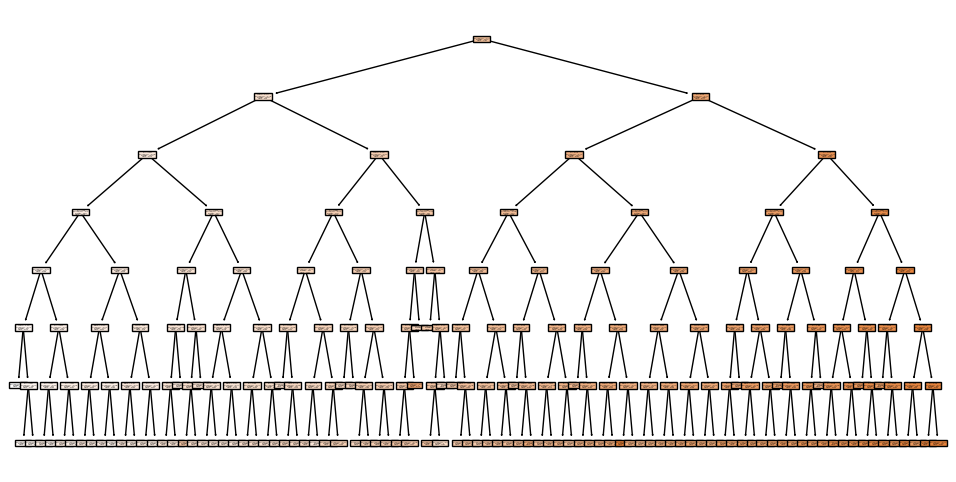

In [94]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);

In [95]:
#prediccion
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [96]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.190376,0.058806,0.242500,0.943772,test,Decision tree II
1,0.187579,0.057047,0.238845,0.944630,train,Decision tree II


In [97]:
df_all = pd.concat([lr_results, dt_results1, dt_results2], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.211056,0.072819,0.269851,0.930373,test,Regresion lineal
1,0.209879,0.072877,0.269958,0.929265,train,Regresion lineal
0,0.258223,0.112219,0.334990,0.892701,test,Decission Tree I
1,0.000046,0.000006,0.002493,0.999994,train,Decission Tree I
0,0.190376,0.058806,0.242500,0.943772,test,Decision tree II
1,0.187579,0.057047,0.238845,0.944630,train,Decision tree II


XGB REGRESSOR

In [98]:
# 8. XGB Regressor
xgb = XGBRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5)
xgb.fit(X_train, y_train)
#prediccion
y_pred_test_xgb= xgb.predict(X_test)
y_pred_train_xgb = xgb.predict(X_train)

In [99]:
xgb_results = metricas(y_test, y_train, y_pred_test, y_pred_train, " XGB Regressor")
xgb_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.211056,0.072819,0.269851,0.930373,test,XGB Regressor
1,0.209879,0.072877,0.269958,0.929265,train,XGB Regressor


gradient boosting

In [100]:
# 12. Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200)
gb.fit(X_train, y_train)
#prediccion
y_pred_test_gb= gb.predict(X_test)
y_pred_train_gb = gb.predict(X_train)


In [101]:
gb_results = metricas(y_test, y_train, y_pred_test, y_pred_train, " GradientBoosting regressor")
gb_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.211056,0.072819,0.269851,0.930373,test,GradientBoosting regressor
1,0.209879,0.072877,0.269958,0.929265,train,GradientBoosting regressor


RandomForest

In [102]:
param = {"max_depth": [ 6, 7,8,9,10],#desppues de sacar el besttree estimator se ajustan estor hiperparametros
        "min_samples_split": [10, 15,20],
        "max_features": [3,4,5,6],
         'min_samples_leaf': [10,15,20,40,50]}# aqui despues de ver el best estimator, se ajustan y se quitan hiperparametros.

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [103]:
bosque.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [10, 15, 20, 40, 50],
                         'min_samples_split': [10, 15, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [104]:
#se miran estos parametros y se ajusta el modelo(mas arriba)
bos = bosque.best_estimator_
bos

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=10,
                      min_samples_split=10)

In [105]:
#prediccion
y_pred_test_rf = bos.predict(X_test)
y_pred_train_rf = bos.predict(X_train)

In [106]:
rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.184183,0.055080,0.234690,0.947335,test,Random Forest
1,0.174310,0.049696,0.222925,0.951766,train,Random Forest


In [107]:
df_all_outliers = pd.concat([df_all,xgb_results, gb_results, rf_results], axis = 0)
df_all_outliers

,MAE,MSE,RMSE,R2,set,modelo
0,0.211056,0.072819,0.269851,0.930373,test,Regresion lineal
1,0.209879,0.072877,0.269958,0.929265,train,Regresion lineal
0,0.258223,0.112219,0.334990,0.892701,test,Decission Tree I
1,0.000046,0.000006,0.002493,0.999994,train,Decission Tree I
0,0.190376,0.058806,0.242500,0.943772,test,Decision tree II
1,0.187579,0.057047,0.238845,0.944630,train,Decision tree II
0,0.211056,0.072819,0.269851,0.930373,test,XGB Regressor
1,0.209879,0.072877,0.269958,0.929265,train,XGB Regressor
0,0.211056,0.072819,0.269851,0.930373,test,GradientBoosting regressor
1,0.209879,0.072877,0.269958,0.929265,train,GradientBoosting regressor


In [108]:
#generamos el pickle del mejor modelo con outliers:
with open (f"data/rdm_forest_sinoutliers.pkl", "wb") as modelo:
    pickle.dump(bos, modelo)

In [109]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.147387,3.0,1.0,7.0,0.573447,0.297165,-1.266867,-1.304288,-1.241318,6.353
1,0.633437,0.0,0.0,2.0,0.845121,-0.669536,0.617984,0.656417,0.728852,9.183
2,-0.093942,0.0,3.0,4.0,0.030100,0.780515,-0.016255,0.008845,0.004525,7.983
3,0.809011,1.0,2.0,7.0,1.297910,-0.186186,0.725180,0.692394,0.844744,8.371
4,-0.996895,3.0,2.0,3.0,0.482890,0.780515,-1.097141,-1.061449,-1.038506,6.588


# limpieza del test

In [119]:
df_test = pd.read_csv("data/test.csv")
df_test.drop("id", axis =1, inplace=True)
df_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67


In [137]:
df_test.shape

(13485, 9)

In [111]:
df_test.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [112]:
# estandarizacion
with open('data/estand_standar_sin_outliers.pkl', 'rb') as estandar:
    estandar = pickle.load(estandar)

In [117]:
df_test_estand = pd.DataFrame(estandar.transform(df_test[['carat', 'depth', 'table', 'x', 'y', 'z']]), columns = ['carat', 'depth', 'table', 'x', 'y', 'z'])
df_test_estand.head()

,carat,depth,table,x,y,z
0,-4.651907,-56.973507,-27.593518,-6.152896,-6.156956,-6.879979
1,1.135889,-55.005332,-27.126263,-4.261694,-4.336860,-3.606165
2,3.778143,-55.743398,-27.359891,-3.663213,-3.641179,-2.682781
3,-1.946741,-56.891500,-28.060773,-4.947953,-5.016363,-5.012226
4,2.771570,-53.447193,-28.294401,-3.894626,-4.005198,-2.745739


In [138]:
df_test_estand.shape

(13485, 6)

In [120]:
df_test.select_dtypes(include = "object").columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [121]:
df_test_cat= df_test[['cut', 'color', 'clarity']]
df_test_cat.head()

,cut,color,clarity
0,Ideal,I,SI1
1,Premium,I,SI1
2,Premium,D,SI1
3,Premium,D,SI2
4,Fair,E,SI2


In [146]:
df_test_cat.shape

(13485, 3)

In [122]:
# encoding
with open('data/sin_encoder_clarity.pkl', 'rb') as encoding:
    encoding = pickle.load(encoding)

In [124]:
df_test_clarity = pd.DataFrame(encoding.transform(df_test_cat[['clarity']]), columns =['clarity'])
df_test_clarity.head()

,clarity
0,2
1,2
2,2
3,3
4,3


In [147]:
df_test_clarity.shape

(13485, 1)

In [125]:
# encoding
with open('data/sin_encoder_cut.pkl', 'rb') as encoding:
    encoding = pickle.load(encoding)

In [126]:
df_test_cut = pd.DataFrame(encoding.transform(df_test_cat[['cut']]), columns =['cut'])
df_test_cut.head()

,cut
0,2
1,3
2,3
3,3
4,0


In [148]:
df_test_cut.shape

(13485, 1)

In [127]:
# encoding
with open('data/sin_encoder_color.pkl', 'rb') as encoding:
    encoding = pickle.load(encoding)

In [128]:
df_test_color= pd.DataFrame(encoding.transform(df_test_cat[['color']]), columns =['color'])
df_test_color.head()

,color
0,5
1,5
2,0
3,0
4,1


In [149]:
df_test_color.shape

(13485, 1)

In [167]:
df_test_final = pd.concat([df_test_estand,df_test_cut,df_test_color,df_test_clarity], axis = 1)
df_test_final.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,-4.651907,-56.973507,-27.593518,-6.152896,-6.156956,-6.879979,2,5,2
1,1.135889,-55.005332,-27.126263,-4.261694,-4.336860,-3.606165,3,5,2
2,3.778143,-55.743398,-27.359891,-3.663213,-3.641179,-2.682781,3,0,2
3,-1.946741,-56.891500,-28.060773,-4.947953,-5.016363,-5.012226,3,0,3
4,2.771570,-53.447193,-28.294401,-3.894626,-4.005198,-2.745739,0,1,3


In [168]:
df_test_final.shape

(13485, 9)

In [169]:
#le pongo el mismo prden a las columnas a los sets de train y test, sino no seria capaz de hacer las predicciones

column_order = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

df_test_final = df_test_final.reindex(column_order, axis=1)

df_test_final.head()


,carat,cut,color,clarity,depth,table,x,y,z
0,-4.651907,2,5,2,-56.973507,-27.593518,-6.152896,-6.156956,-6.879979
1,1.135889,3,5,2,-55.005332,-27.126263,-4.261694,-4.336860,-3.606165
2,3.778143,3,0,2,-55.743398,-27.359891,-3.663213,-3.641179,-2.682781
3,-1.946741,3,0,3,-56.891500,-28.060773,-4.947953,-5.016363,-5.012226
4,2.771570,0,1,3,-53.447193,-28.294401,-3.894626,-4.005198,-2.745739


In [170]:
df_test_final.shape

(13485, 9)

# se hace la prediccion del mejor modelo

In [171]:
# cargamos el mejor modelo
with open('data/rdm_forest_sinoutliers.pkl', 'rb') as modelo:
    modelo = pickle.load(modelo)

In [172]:
resultado1 = pd.DataFrame(modelo.predict(df_test_final), columns = ["price"]).reset_index()
resultado1.rename(columns = {"index": "id"}, inplace = True)
resultado1.head()

,id,price
0,0,5.937266
1,1,6.953276
2,2,6.956964
3,3,5.938399
4,4,6.960726


In [173]:
resultado1.to_csv("data/modelo_sin.csv", index = False)

In [174]:
resultado1.shape

(13485, 2)

In [136]:
df_test_final.shape

(40415, 9)

In [175]:
importancia_predictores_rf = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': bos.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,carat,0.179117
1,cut,0.000293
2,color,0.000413
3,clarity,0.000403
4,depth,0.001753
5,table,0.001839
6,x,0.128190
7,y,0.680366
8,z,0.007626


In [176]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': bos.feature_importances_})
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values(by = "importancia", ascending = False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
7,y,0.680366
0,carat,0.179117
6,x,0.128190
8,z,0.007626
5,table,0.001839
4,depth,0.001753
2,color,0.000413
3,clarity,0.000403
1,cut,0.000293
